In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

In [ ]:
main_dir = '/content/drive/MyDrive/Image Processing'

In [ ]:
import pandas as pd
import numpy as np

#modul scirt learn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import os
#note: ganti variabelnya biar sama, pathnya juga (ofc)
fold_piring = os.path.join('/content/drive/MyDrive/Image Processing/Piring Plastik')
fold_sendok = os.path.join('/content/drive/MyDrive/Image Processing/Sendok')

print('jumlah total gambar Piring :', len(os.listdir(fold_piring)))
print('jumlah total gambar Sendok :', len(os.listdir(fold_sendok)))

jumlah total gambar Piring : 100
jumlah total gambar Sendok : 100


In [ ]:
#ganti lagi euy
print("Menampilkan nama file gambar :")

file_piring = os.listdir(fold_piring)
print("Piring :",file_piring[:5])

file_sendok = os.listdir(fold_sendok)
print("Sendok :",file_sendok[:5])

Menampilkan nama file gambar :
Piring : ['Image_36.jpg', 'Image_1.jpg', 'Image_2.jpg', 'Image_6.JPG', 'Image_5.jpg']
Sendok : ['2.sendok-masak-kayu-dan-alat-masak-dari-kayu-lainnya-_190730083219-916.jpg', '1.5ee215fb87c7b.jpg', '3.f212c24f1d778e43b0e324a0764d3ab6.jpg_720x720q80.jpg_.webp', '8.71461dddd598d7c9ce55f38600e7fc1d.jpg', '7.0713085_pe729237_s5.jpg']


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
#ganti directory ke folder seluruh dataset
main_dir = "/content/drive/MyDrive/Image Processing"
training_datagen = ImageDataGenerator(
        rescale = 1./255,
#augmentasi
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
#split data
        validation_split=0.25
        )

train_generator = training_datagen.flow_from_directory(
    main_dir,
    target_size=(150,150),
    class_mode='binary',
    shuffle=True,
    subset='training'
    )
validation_generator = training_datagen.flow_from_directory(
    main_dir,
    target_size=(150,150),
    class_mode='binary',
    shuffle=True,
    subset='validation'
    )

Found 143 images belonging to 2 classes.
Found 47 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit
history = model.fit(
      train_generator,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=2,  # berapa batch yang akan dieksekusi pada setiap epoch
      steps_per_epoch=2,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=13, # tambahkan epochs jika akurasi model belum optimal
      verbose=2)

Epoch 1/13
2/2 - 18s - loss: 1.2271 - accuracy: 0.4468 - val_loss: 0.8167 - val_accuracy: 0.5319 - 18s/epoch - 9s/step
Epoch 2/13
2/2 - 8s - loss: 0.7414 - accuracy: 0.5312 - val_loss: 0.6918 - val_accuracy: 0.5319 - 8s/epoch - 4s/step
Epoch 3/13


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/2 - 7s - loss: 0.7079 - accuracy: 0.4255 - val_loss: 0.6918 - val_accuracy: 0.4681 - 7s/epoch - 3s/step
Epoch 4/13
2/2 - 8s - loss: 0.6956 - accuracy: 0.4375 - val_loss: 0.6872 - val_accuracy: 0.5319 - 8s/epoch - 4s/step
Epoch 5/13
2/2 - 8s - loss: 0.6820 - accuracy: 0.6094 - val_loss: 0.6814 - val_accuracy: 0.5319 - 8s/epoch - 4s/step
Epoch 6/13
2/2 - 7s - loss: 0.6812 - accuracy: 0.5532 - val_loss: 0.6770 - val_accuracy: 0.5319 - 7s/epoch - 3s/step
Epoch 7/13
2/2 - 8s - loss: 0.6477 - accuracy: 0.6562 - val_loss: 0.6573 - val_accuracy: 0.6809 - 8s/epoch - 4s/step
Epoch 8/13
2/2 - 8s - loss: 0.6172 - accuracy: 0.7188 - val_loss: 0.7181 - val_accuracy: 0.4894 - 8s/epoch - 4s/step
Epoch 9/13
2/2 - 6s - loss: 0.6709 - accuracy: 0.4894 - val_loss: 0.6144 - val_accuracy: 0.6596 - 6s/epoch - 3s/step
Epoch 10/13
2/2 - 8s - loss: 0.5642 - accuracy: 0.7344 - val_loss: 0.5924 - val_accuracy: 0.6596 - 8s/epoch - 4s/step
Epoch 11/13
2/2 - 8s - loss: 0.5746 - accuracy: 0.7344 - val_loss: 0.6245 

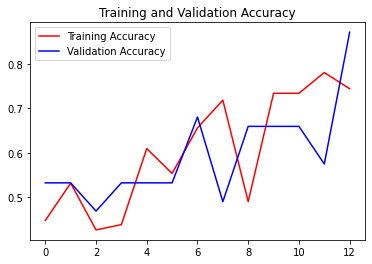

<Figure size 432x288 with 0 Axes>

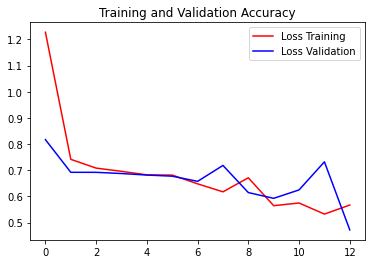

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validation')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#save model
import pickle

pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

Saving Image_42.jpg to Image_42.jpg
1/1 [==============================] - 0s 149ms/step
Image_42.jpg
Piring


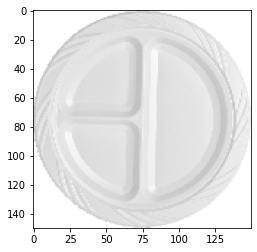

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('Piring')
  else:
    print("Sendok")